In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [3]:
flat = pd.read_csv('flats.csv')
flat.info()
flat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
df = flat["Area"].apply(pd.to_numeric, errors= 'coerce')
flat["Area"] = df

flat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


In [5]:
#Missing value
data_Nan_info = flat.isnull().sum()
flat.dropna(axis=0, inplace=True)
flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


-----------------------------------------------------------------------------------------------------------------------------------------------------------

Outliers

In [6]:
df = pd.DataFrame(flat["Area"])
q1 = df.quantile(0.25)
q3= df.quantile(0.75)
iqr = q3 - q1
upper_extrem = float(q3 + (1.5 * iqr))
lower_extrem = float(q1 - (iqr * 1.5))
print(upper_extrem,'&', lower_extrem)


196.5 & -7.5


In [7]:
flat_filtered = flat[flat['Area'] <= upper_extrem]
flat_filtered


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [8]:
#dfu = pd.DataFrame(flat['Price(USD)'])
#q1u = df.quantile(0.25)
#q3u= df.quantile(0.75)
#iqr_u = q3 - q1
#upper_u_extrem = float(q3u + (1.5 * iqr_u))

#flat_u_filtered = flat[flat['Price(USD)'] >= upper_u_extrem]
#flat_u_filtered

-----------------------------------------------------------------------------------------------------------------------------------------------------------

Dumy Variables

In [9]:
#flat_data = flat_filtered
flat_data = pd.get_dummies(flat_filtered)
flat_data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,True,True,True,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,True,True,True,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,True,True,True,5.500000e+08,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,True,True,True,9.025000e+08,30083.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,True,True,True,7.000000e+09,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------------------------------------------------------------

Data Normalize

In [10]:
from sklearn.preprocessing import scale, normalize, minmax_scale
flat_data.describe()

,Area,Room,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Abuzar,Address_Afsarieh,Address_Ahang,Address_Air force,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
count,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,...,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000
mean,93.233811,1.984122,3.915048e+09,1.305016e+05,0.006849,0.000623,0.000934,0.001868,0.000623,0.002802,...,0.000934,0.044832,0.003113,0.000934,0.000311,0.011519,0.002802,0.004981,0.001245,0.000311
std,33.763902,0.658932,3.868330e+09,1.289443e+05,0.082490,0.024949,0.030552,0.043187,0.024949,0.052868,...,0.030552,0.206967,0.055719,0.030552,0.017645,0.106725,0.052868,0.070413,0.035273,0.017645
min,30.000000,0.000000,3.600000e+06,1.200000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,2.000000,1.300000e+09,4.333333e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,2.000000,2.600000e+09,8.666667e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,2.000000,5.100000e+09,1.700000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,195.000000,5.000000,3.349000e+10,1.116333e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#euclidean norm
scale_data = normalize(flat_data, norm='l2', axis=0)

In [12]:
df_data = pd.DataFrame(scale_data,
                        index = flat_data.index,
                        columns= flat_data.columns)

df_data

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,0.011211,0.00844,0.019256,0.018455,0.019822,0.005931,0.005931,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010677,0.00844,0.019256,0.018455,0.019822,0.005931,0.005931,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.014058,0.01688,0.019256,0.018455,0.019822,0.001763,0.001763,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016905,0.01688,0.019256,0.018455,0.019822,0.002894,0.002894,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021887,0.01688,0.019256,0.018455,0.019822,0.022443,0.022443,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.015303,0.01688,0.019256,0.018455,0.019822,0.011222,0.011222,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3475,0.014769,0.01688,0.019256,0.018455,0.019822,0.021802,0.021802,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476,0.013346,0.01688,0.000000,0.000000,0.000000,0.001170,0.001170,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.018684,0.01688,0.019256,0.018455,0.019822,0.017954,0.017954,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
flat_data = df_data

---------------------------------------------------------------------------------------------

In [14]:
from sklearn.model_selection import train_test_split


rial_price = flat_data.drop(["Price(USD)"], axis= 1)
x = rial_price.drop(["Price"], axis= 1)
y = rial_price["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)
x


,Area,Room,Parking,Warehouse,Elevator,Address_Abazar,Address_Abbasabad,Address_Abuzar,Address_Afsarieh,Address_Ahang,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,0.011211,0.00844,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010677,0.00844,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.014058,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016905,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021887,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.015303,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3475,0.014769,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476,0.013346,0.01688,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.018684,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#USD
usd_price = flat_data.drop(['Price'], axis= 1)
xu = usd_price.drop(["Price(USD)"], axis= 1)
yu = usd_price["Price(USD)"]

xu_train, xu_test, yu_train, yu_test = train_test_split(xu, yu, test_size = 0.3, random_state= 42)
xu

,Area,Room,Parking,Warehouse,Elevator,Address_Abazar,Address_Abbasabad,Address_Abuzar,Address_Afsarieh,Address_Ahang,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,0.011211,0.00844,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010677,0.00844,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.014058,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016905,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021887,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.015303,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3475,0.014769,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476,0.013346,0.01688,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.018684,0.01688,0.019256,0.018455,0.019822,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Predict Prices')

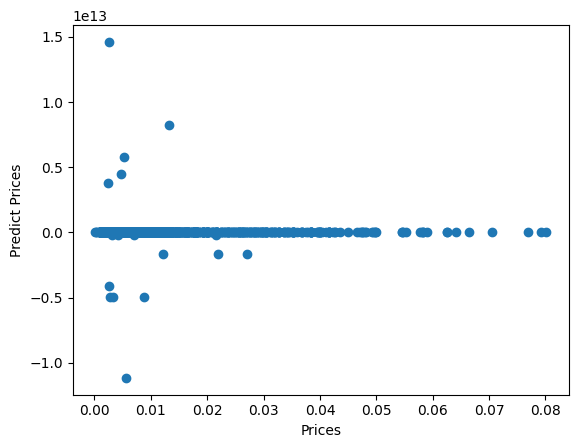

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predict Prices')

Text(0, 0.5, 'Predict Prices(USD)')

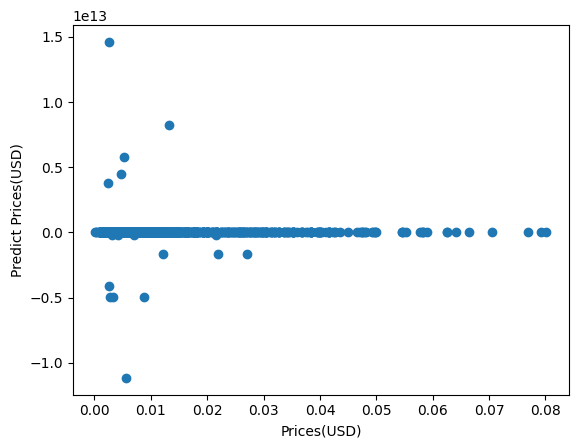

In [17]:
reg.fit(xu_train, yu_train)
yu_pred = reg.predict(xu_test)

plt.scatter(yu_test, yu_pred)
plt.xlabel('Prices(USD)')
plt.ylabel('Predict Prices(USD)')

Mean square error (MSE)

In [18]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

5.938512035392331e+23

In [19]:
sklearn.metrics.mean_squared_error(yu_test, yu_pred)

5.938512247682774e+23